In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
import zipfile
import scipy.stats as stats
from glob import glob
import os
import shutil
%matplotlib inline

In [2]:
url = 'http://epidemiologia.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
r = requests.get(url, allow_redirects=True)
open('BD.zip', 'wb').write(r.content)

21467076

In [3]:
with zipfile.ZipFile('BD.zip', 'r') as zip_ref:
    zip_ref.extractall('datatemp')

In [4]:
filename = glob("datatemp/*.csv")[0]

In [5]:
df = pd.read_csv(filename, encoding = "ISO-8859-1")

In [6]:
shutil.rmtree("datatemp")
os.remove('BD.zip')

In [7]:
df = df.loc[(df['RESULTADO'] == 1)]

In [8]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-03,0a3442,2,4,21,2,12,21,114,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1,2020-08-03,0a66da,2,4,2,1,2,2,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-08-03,0d20d1,2,4,9,2,9,9,7,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-03,0c47db,2,3,27,2,27,27,12,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
4,2020-08-03,07d09d,2,4,30,1,30,30,193,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97


In [9]:
actDate = df['FECHA_ACTUALIZACION'][0]

In [10]:
df.drop(['FECHA_ACTUALIZACION', 'RESULTADO', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN'], axis=1)

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
0,0a3442,2,4,21,2,12,21,114,2,2020-04-16,...,2,2,1,2,2,2,2,99,99,2
1,0a66da,2,4,2,1,2,2,2,1,2020-04-21,...,2,2,2,2,2,2,2,99,99,97
2,0d20d1,2,4,9,2,9,9,7,1,2020-04-22,...,2,2,2,2,1,2,2,99,99,97
3,0c47db,2,3,27,2,27,27,12,1,2020-05-03,...,2,2,2,2,2,2,2,2,99,97
4,07d09d,2,4,30,1,30,30,193,1,2020-03-26,...,2,2,2,2,1,2,2,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794871,152042,2,4,30,2,30,30,207,1,2020-07-11,...,2,1,2,2,1,2,2,99,99,97
794872,180761,2,4,26,2,26,26,29,2,2020-07-09,...,2,2,2,2,2,2,2,99,99,2
794873,05315e,1,6,10,1,10,10,5,1,2020-07-11,...,2,2,2,2,2,2,2,2,99,97
794874,01c717,2,12,11,1,11,11,7,1,2020-07-11,...,2,2,2,2,2,2,2,2,99,97


In [11]:
df.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGE

In [12]:
df['muerte'] = np.where(df['FECHA_DEF']!= '9999-99-99', True, False)

In [13]:
mun_df = pd.read_csv("catalogos/catun_municipio.csv", encoding = "ISO-8859-1")
mun_list = mun_df[['cve_mun','nom_mun','cve_ent','nom_ent']]
est_df = pd.read_csv("catalogos/CATUN_ENTIDAD.csv", encoding = "ISO-8859-1")

In [14]:
sector_counts = df["SECTOR"].value_counts().rename_axis('SECTOR').reset_index(name='CASOS')

In [15]:
sector_deaths = df.groupby('SECTOR')['muerte'].apply(lambda x: (x==True).sum()).reset_index(name='FALLECIMIENTOS')

In [16]:
catSector_df = pd.read_csv("catalogos/catSector.csv", encoding = "ISO-8859-1")
catSector_df = catSector_df[['ï»¿CLAVE', 'DESCRIPCIÃN']]
catSector_df.columns = ['SECTOR', 'NOMBRE']

In [17]:
mergeSector_df = pd.merge(sector_counts, sector_deaths, on="SECTOR", how="outer").sort_values(by=['SECTOR'])
statsSector_df = pd.merge(mergeSector_df, catSector_df, left_on='SECTOR', right_on='SECTOR', how="left").sort_values(by=['CASOS'])
statsSector_df = statsSector_df[['SECTOR', 'NOMBRE', 'CASOS', 'FALLECIMIENTOS']]
statsSector_df['TASA_FALLECIMIENTOS'] = statsSector_df['FALLECIMIENTOS']/statsSector_df['CASOS']
statsSector_df

,SECTOR,NOMBRE,CASOS,FALLECIMIENTOS,TASA_FALLECIMIENTOS
1,2,DIF,36,0,0.000000
0,1,CRUZ ROJA,42,3,0.071429
11,13,UNIVERSITARIO,296,43,0.145270
5,7,MUNICIPAL,427,15,0.035129
8,10,SEDENA,3006,339,0.112774
9,11,SEMAR,3306,191,0.057774
12,99,NO ESPECIFICADO,3455,390,0.112880
6,8,PEMEX,5405,774,0.143201
2,3,ESTATAL,9798,1151,0.117473
7,9,PRIVADA,13091,584,0.044611


In [18]:
tasaFallProm =  statsSector_df['FALLECIMIENTOS'].sum()/statsSector_df['CASOS'].sum()
tasaFallProm

0.10818069772629463

<BarContainer object of 13 artists>

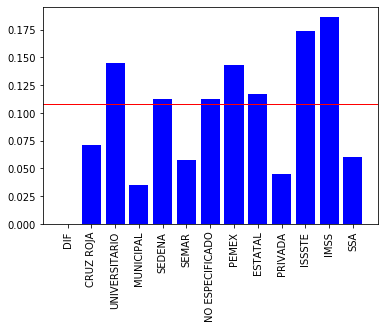

In [19]:
plt.xticks(rotation='vertical')
plt.axhline(y=tasaFallProm,linewidth=1, color='red')
plt.bar(statsSector_df['NOMBRE'], statsSector_df['TASA_FALLECIMIENTOS'], color="b", align="center")

In [20]:
state_counts = df["ENTIDAD_RES"].value_counts().rename_axis('ENTIDAD').reset_index(name='CASOS')
state_deaths = df.groupby('ENTIDAD_RES')['muerte'].apply(lambda x: (x==True).sum()).reset_index(name='FALLECIMIENTOS')

In [21]:
est_df.columns.values[0] = "ID"
est_df.columns.values[1] = "NOMBRE_ESTADO"

In [22]:
catEstado_df = est_df[['ID', 'NOMBRE_ESTADO']]

In [23]:
mergeEstado_df = pd.merge(state_counts, state_deaths,  left_on='ENTIDAD', right_on='ENTIDAD_RES', how="outer").sort_values(by=['ENTIDAD'])
statsEstado_df = pd.merge(mergeEstado_df, catEstado_df, left_on='ENTIDAD', right_on='ID', how="left").sort_values(by=['NOMBRE_ESTADO'])
statsEstado_df = statsEstado_df[['ENTIDAD', 'NOMBRE_ESTADO', 'CASOS', 'FALLECIMIENTOS']]
statsEstado_df['TASA_FALLECIMIENTOS'] = statsEstado_df['FALLECIMIENTOS']/statsEstado_df['CASOS']
statsEstado_df.sort_values(by=['TASA_FALLECIMIENTOS'], inplace = True)
statsEstado_df

,ENTIDAD,NOMBRE_ESTADO,CASOS,FALLECIMIENTOS,TASA_FALLECIMIENTOS
2,3,Baja California Sur,4669,182,0.038981
10,11,Guanajuato,22009,1020,0.046345
4,5,Coahuila de Zaragoza,13579,673,0.049562
23,24,San Luis PotosÃ­,10552,545,0.051649
27,28,Tamaulipas,17311,1013,0.058518
18,19,Nuevo LeÃ³n,19256,1143,0.059358
0,1,Aguascalientes,4168,258,0.061900
9,10,Durango,4331,288,0.066497
15,16,MichoacÃ¡n de Ocampo,10278,793,0.077155
30,31,YucatÃ¡n,10459,901,0.086146


<BarContainer object of 32 artists>

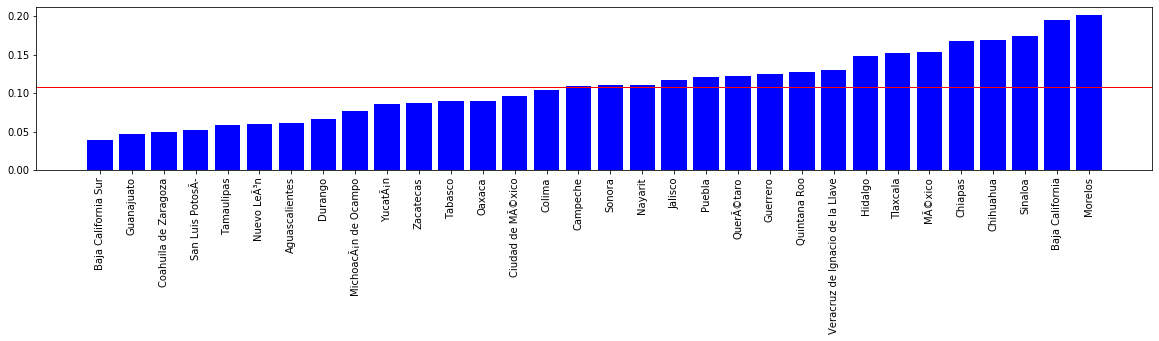

In [24]:
plt.figure(figsize=(20,3))
plt.xticks(rotation='vertical')
plt.axhline(y=tasaFallProm,linewidth=1, color='red')
plt.bar(statsEstado_df['NOMBRE_ESTADO'], statsEstado_df['TASA_FALLECIMIENTOS'], color="b", align="center")